In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from helpers import *

from utils.mnist_reader import load_mnist


In [2]:
def reduce_to_4_classes(X_orig, Y_orig):
    X = []
    Y = []
    for x, y in zip(X_orig, Y_orig):
        if y <= 9:
            X.append(x)
            Y.append(y)
    Y_numpy = np.array(Y)
    X_numpy = np.array(X)
    print(Y_numpy)
    return X_numpy, Y_numpy


def reduce_to_0_and_rest(X_orig, Y_orig):
    X = []
    Y = []
    for x, y in zip(X_orig, Y_orig):
        if y > 0:
            X.append(x)
            Y.append(1)
        else:
            X.append(x)
            Y.append(y)
    Y_numpy = np.array(Y)
    X_numpy = np.array(X)
    print(Y_numpy)
    return X_numpy, Y_numpy


def load_minst_wrapper(path, kind):
    X, Y = load_mnist(path, kind)
    return reduce_to_4_classes(X, Y)


Xtrn, Ytrn = load_minst_wrapper('data', 'train')
Xtst, Ytst = load_minst_wrapper('data', 't10k')

[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


In [4]:
Xtrn = np.divide(Xtrn, 255)
Xtst = np.divide(Xtst, 255)
Xmean = Xtrn.mean(axis=0)
# Substract means
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean

In [ ]:
SVM = SVC(kernel="rbf", C=9.0, gamma="auto", cache_size=2000)
SVM.fit(Xtrn_nm, Ytrn)
Y_pred = SVM.predict(Xtst_nm)
accuracy = SVM.score(Xtst_nm, Ytst)
conf_matrix = confusion_matrix(Ytst, Y_pred)
print(f"SVM Model's accuracy: {accuracy}")
cm = confusion_matrix(Ytst, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

In [9]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15, 10))
lw = 2.5

# Create dataset with normalized data and labels
xtrn_ytrn_data = pd.concat([pd.DataFrame(data=Xtrn), pd.DataFrame(data=Ytrn, columns=['class'])]
                           , axis=1).sort_values(by=['class'])

# Create small samples of data to speed up training
Xsmall = pd.concat([xtrn_ytrn_data[xtrn_ytrn_data['class'] == i].iloc[:1000, :-1] for i in range(0, 10)], axis=0).values
Ysmall = pd.concat([xtrn_ytrn_data[xtrn_ytrn_data['class'] == i].iloc[:1000, -1] for i in range(0, 10)], axis=0).values

# Shuffle data
Xsmall, Ysmall = shuffle(Xsmall, Ysmall)

# Create logspace to loop over
# Cs = np.logspace(-2,3, num=10)
Cs = [x for x in np.arange(8, 18, 0.5)]
print(Cs)
# Mean Cross Validation accuracy calculation
MCV_list = []

for C in Cs:
    current_svm = SVC(kernel='rbf', C=C)
    kf = KFold(n_splits=3, random_state=1, shuffle=True)
    mean_crossval = np.mean(cross_val_score(current_svm, Xsmall, Ysmall, cv=kf, n_jobs=-1))
    MCV_list.append(mean_crossval)
    print("On C=", C, "\tMCV=", mean_crossval)




[8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5]
On C= 8.0 	MCV= 0.9914989952471212
On C= 8.5 	MCV= 0.9914989952471212
On C= 9.0 	MCV= 0.9909992451221837
On C= 9.5 	MCV= 0.9909992451221837
On C= 10.0 	MCV= 0.9909992451221837
On C= 10.5 	MCV= 0.9909992451221837
On C= 11.0 	MCV= 0.9909992451221837
On C= 11.5 	MCV= 0.9904987446216831
On C= 12.0 	MCV= 0.9904987446216831
On C= 12.5 	MCV= 0.9904987446216831
On C= 13.0 	MCV= 0.9904987446216831
On C= 13.5 	MCV= 0.9904987446216831
On C= 14.0 	MCV= 0.9904987446216831
On C= 14.5 	MCV= 0.9904987446216831
On C= 15.0 	MCV= 0.9904987446216831
On C= 15.5 	MCV= 0.9904987446216831
On C= 16.0 	MCV= 0.9904987446216831
On C= 16.5 	MCV= 0.9904987446216831
On C= 17.0 	MCV= 0.9904987446216831
On C= 17.5 	MCV= 0.9904987446216831


<Figure size 1080x720 with 0 Axes>

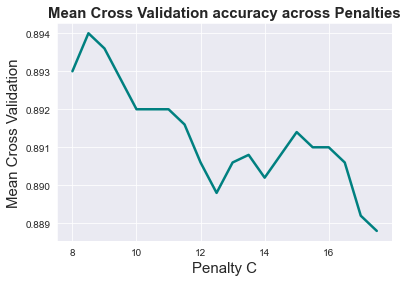

In [71]:
plt.plot(Cs, MCV_list, color='teal', linewidth=lw)
plt.title("Mean Cross Validation accuracy across Penalties", fontsize=15, fontweight="bold")
plt.xlabel('Penalty C', fontsize=15)
# plt.xscale("log")
plt.ylabel('Mean Cross Validation', fontsize=15)
plt.show()